# Section 1: Dataloading

In [2]:
import pandas as pd

In [ ]:
rmrb_df = pd.read_csv('data/processed/peoples_daily_olympics.tsv', sep='\t')
rmrb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37831 entries, 0 to 37830
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     37831 non-null  object
 1   content  37831 non-null  object
dtypes: object(2)
memory usage: 591.2+ KB


In [4]:
rmrb_df.head()

,date,content
0,1950-08-03,第5版专栏：争取和平第一爱伦堡亲爱的朋友们！斯德哥尔摩是欧洲的一个最美丽的城市，我们每一个人...
1,1951-12-07,第4版专栏：北欧举行和平大会各国代表斥美英集团威胁北欧要求以和平方式解决国际冲突【新华社五日...
2,1952-02-13,第4版专栏：我国体育总会致电国际奥林匹克委员会通知参加本届奥林匹克运动大会【新华社十二日讯】...
3,1952-02-29,第4版专栏：资本主义各国许多工商界和社会人士渴望参加莫斯科国际经济会议日本世界经济委员会等团...
4,1952-04-24,第1版专栏：布兰德魏纳报告美国细菌战真相维也纳数千听众高呼“美军滚出朝鲜去！”加斯特尔在伦敦...


In [5]:
nyt_df = pd.read_csv('data/processed/nyt.tsv', sep='\t')
nyt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65206 entries, 0 to 65205
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     65206 non-null  object
 1   content  65206 non-null  object
dtypes: object(2)
memory usage: 1019.0+ KB


In [6]:
nyt_df.head()

,date,content
0,1980-01-01,officials of the united states department of c...
1,1980-01-02,"washington, jan. 1--a ranking administration o..."
2,1980-01-03,with the start of the winter olympics at lake ...
3,1980-01-03,"pasadena, calif., jan. 2 (ap)-- frank wykoff, ..."
4,1980-01-04,neville trotter is as right as two martinis at...


In [7]:
dfs = {'rmrb': rmrb_df, 'nyt': nyt_df}

# Section 2: naive keywords matching

In [8]:
# TODO: use direct translation or not?

IN_GROUP_WORDS = {
    'rmrb': [
        # 国家/民族
        '中华民族', '我们国家', '我国', '祖国', '全国人民', '中国特色', '复兴', '伟业',
        # 荣誉与成就
        '胜利', '成就', '光荣', '荣誉', '辉煌', '屡创佳绩', '创纪录', '冠军', '金牌', '卫冕', '旗开得胜', '登上领奖台',
        # 集体精神
        '团结', '齐心协力', '配合默契', '同心协力', '拼搏精神', '顽强',
        # 正面评价
        '伟大', '进步', '飞跃', '表现出色', '优异表现', '精神可嘉', '不屈不挠', '拼搏',
        # 国家机构与团体
        # '国家队', '中国代表团', '国家体育总局', '中国奥委会', '中国运动员'
    ],
    'nyt': [
        # National identity and unity
        "team usa", "our team", "our athletes", "our nation", "the americans",
        "us delegation", "american athletes", "national pride", "our flag", "stars and stripes",

        # Positive collective values
        "determination", "courage", "perseverance", "grit", "champion", "hero", "honor",
        "resilience", "spirit", "integrity", "dedication",

        # Celebratory phrases
        "brought home the gold", "stood on the podium", "celebrated victory", "proud moment",
        "historic win", "gold medal", "swept the podium", "made history", "cheered by the crowd",

        # Team and support terms
        "cohesive unit", "stood together", "fought hard", "defended title", "represented with pride",
        "underdog victory", "team effort", "home crowd", "dominated the event", "carried the flag",
    ], 
}

In [9]:
len(IN_GROUP_WORDS['rmrb']), len(IN_GROUP_WORDS['nyt'])

(34, 40)

In [10]:
OUT_GROUP_WORDS = {
    'rmrb': [
        # 外国国家
        # '美国', '日本', '西方国家', '英国', '法国', '德国', '外国选手', '韩国', '澳大利亚',
        # 敌意行为
        '故意犯规', '侮辱', '挑衅', '干涉', '阻挠', '打压', '指责', '诋毁', '抹黑', '抗议',
        # 竞争与冲突
        '对抗', '强敌', '激烈竞争', '激战', '较量', '争夺', '淘汰', '遭遇', '挤压',
        # 西方媒体与机构
        '外媒', '西方媒体', '西方舆论', '裁判偏见', '判罚不公', '黑哨', '操纵',
        # 指责与偏见
        '故意压制', '双标', '偏见', '不公正', '存心刁难', '蓄意中伤', '干扰比赛', '暗箱操作'
    ], 
    'nyt': [
        # Adversarial language
        "rival", "enemy", "archrival", "opponent", "challenger", "contender", "outsider", "foe",
        "undermined", "intimidated", "outmaneuvered", "clashed", "confronted", "struggled against",

        # Negative or suspicious behavior
        "doping", "cheating", "banned", "suspended", "scandal", "testosterone", "controversy",
        "bias", "favoritism", "unfair", "disqualified", "probe", "allegations", "violation",
        "intimidation", "accusation", "sanctions", "manipulated", "boycott",

        # National or ethnic othering
        "the russians", "the chinese", "the soviets", "east germany", "foreign athletes", "outsiders",
        "the communist bloc", "state-sponsored", "propaganda", "iron curtain", "totalitarian",
        "state control", "foreign influence", "ideological enemy",

        # Hostile or militaristic tone
        "battle", "war", "campaign", "front line", "defeated", "crushed", "humiliated", "stormed",
        "seized victory", "obliterated", "fierce competition", "brutal contest",
    ]
}

In [11]:
len(OUT_GROUP_WORDS['rmrb']), len(OUT_GROUP_WORDS['nyt'])


(34, 59)

In [12]:
def score(text, words):
    return sum(1 for word in words if word in text)


In [13]:
rmrb_df['in'] = rmrb_df['content'].apply(lambda x: score(x, IN_GROUP_WORDS['rmrb']))
rmrb_df['out'] = rmrb_df['content'].apply(lambda x: score(x, OUT_GROUP_WORDS['rmrb']))

In [14]:
nyt_df['in'] = nyt_df['content'].apply(lambda x: score(x, IN_GROUP_WORDS['nyt']))
nyt_df['out'] = nyt_df['content'].apply(lambda x: score(x, OUT_GROUP_WORDS['nyt']))

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [22]:
def regression(dataset):
    df = dfs[dataset]
    X = sm.add_constant(df[['in']])
    y = df['out']
    model = sm.OLS(y, X).fit()
    print(model.summary())
    plt.figure(figsize=(df['in'].max() * 0.6, df['out'].max() * 0.5))
    # plt.figure(figsize=(20, 20))
    plt.hist2d(df['in'], df['out'], bins=(
        df['in'].max(), df['out'].max()
    ), cmap='Blues' if dataset == 'nyt' else 'Reds',
      norm='log')
    plt.xticks(range(0, df['in'].max() + 1))
    plt.yticks(range(0, df['out'].max() + 1))
    plt.colorbar(label='Count (log scale)')
    plt.xlabel('Frequency of nationalism words')
    plt.ylabel('Frequency of xenophobia words')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # set x label values
    plt.xticks(range(0, df['in'].max() + 1))
    plt.yticks(range(0, df['out'].max() + 1))
    title_ds = 'People\'s Daily' if dataset == 'rmrb' else 'New York Times'
    plt.title(f'{title_ds} Nationalism - Xenophobia Words', fontsize=12)
    # plot regression line
    plt.plot(df['in'], model.predict(X), color='black', label='Regression line')
    plt.legend()
    # show the equation
    if dataset == 'nyt':
      plt.text(0.5, 0.1, f'y = {model.params[1]:.2f}x + {model.params[0]:.2f}', transform=plt.gca().transAxes,
              fontsize=12, color='black')
    else:
      plt.text(0.5, 0.2, f'y = {model.params[1]:.2f}x + {model.params[0]:.2f}', transform=plt.gca().transAxes,
              fontsize=12, color='black')
    # add p-value and r-squared
    plt.text(0.5, 0.3, f'p-value = {model.pvalues[1]:.2e}', transform=plt.gca().transAxes,
             fontsize=12, color='black')
    plt.text(0.5, 0.4, f'R-squared = {model.rsquared:.2f}', transform=plt.gca().transAxes,
             fontsize=12, color='black')
    plt.savefig(f'figures/{dataset}_in_out.png', dpi=300, bbox_inches='tight')
    plt.show()

                            OLS Regression Results                            
Dep. Variable:                    out   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1030.
Date:                Mon, 02 Jun 2025   Prob (F-statistic):          4.84e-223
Time:                        15:57:48   Log-Likelihood:                -31241.
No. Observations:               37831   AIC:                         6.249e+04
Df Residuals:                   37829   BIC:                         6.250e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1614      0.004     45.646      0.0

/var/folders/dx/2ybxmrds0756ksq2t28pxqn00000gn/T/ipykernel_87544/1325434313.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(0.5, 0.2, f'y = {model.params[1]:.2f}x + {model.params[0]:.2f}', transform=plt.gca().transAxes,
/var/folders/dx/2ybxmrds0756ksq2t28pxqn00000gn/T/ipykernel_87544/1325434313.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(0.5, 0.3, f'p-value = {model.pvalues[1]:.2e}', transform=plt.gca().transAxes,


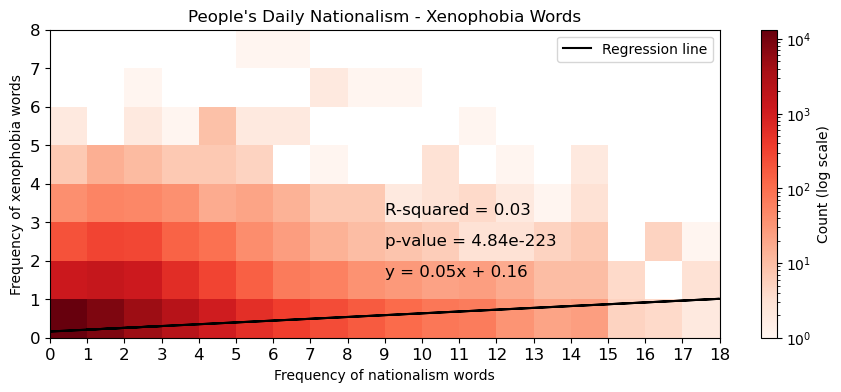

In [23]:
rmrb_m = regression('rmrb')


                            OLS Regression Results                            
Dep. Variable:                    out   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     4891.
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        15:57:48   Log-Likelihood:            -1.1763e+05
No. Observations:               65206   AIC:                         2.353e+05
Df Residuals:                   65204   BIC:                         2.353e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2312      0.008    154.954      0.0

/var/folders/dx/2ybxmrds0756ksq2t28pxqn00000gn/T/ipykernel_87544/1325434313.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(0.5, 0.1, f'y = {model.params[1]:.2f}x + {model.params[0]:.2f}', transform=plt.gca().transAxes,
/var/folders/dx/2ybxmrds0756ksq2t28pxqn00000gn/T/ipykernel_87544/1325434313.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(0.5, 0.3, f'p-value = {model.pvalues[1]:.2e}', transform=plt.gca().transAxes,


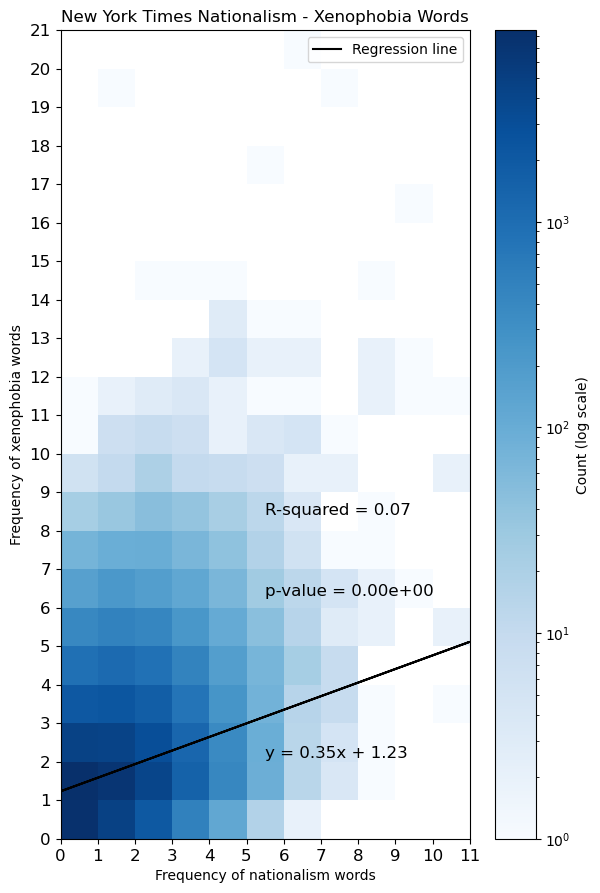

In [24]:
regression('nyt')

Observation:

1. The p-value is basically zero, illustrating significance.
2. The R square is very low (0.03 for rmrb and 0.07 for nyt), which means that current model (least square regression) didn't explain the data well.

Explanation:
1. Almost 0 p-value indicates that, in our dataset, it's almost sure that the coefficient is not zero. Another way to see this near zero p-value is that the size of the dataset (37k, 65k) is big enough to make any small tendency look significant.$$
2. Low R square indicates that, current regression model doesn't have a good prediction ability. One way to explain is that, there could be other factors influencing the regression, or it's just a lot of noise.

Things to note:
It seems that the coefficient is larger in nyt, implying a more negative tone in nyt. However, we cannot compare them directly, because the word counts are based on different wordbase and the languages are different.

In [18]:
rmrb_df.sort_values(by=['out', 'in'], ascending=False).head(10).to_json('rmrb_out_in_top10.json', orient='records', force_ascii=False)
rmrb_df.sort_values(by=['out', 'in'], ascending=False)

,date,content,in,out
35698,2012-08-29,国纪平1处理好同外部世界的关系，是中华民族伟大复兴征程上需要长期面对的重大课题。大国崛起改写...,6,8
35507,2012-08-06,钟文全世界最优秀的运动员齐聚五环旗下，为的是用青春、汗水和激情践行“更快、更高、更强”的奥林...,5,7
325,1958-02-11,第1版专栏：目前国际形势和我国外交政策1958年2月10日在第一届全国人民代表大会第五次会议...,9,6
13073,2000-02-22,第3版(专页)专栏：一个中国的原则与台湾问题中华人民共和国国务院台湾事务办公室国务院新闻办公...,8,6
25761,2008-03-24,新华社记者十天前，西藏拉萨发生打砸抢烧严重暴力犯罪事件。凡是有良知的人，无不对暴徒的残忍罪行...,7,6
...,...,...,...,...
37812,2015-10-13,本报北京10月12日电（记者季芳）由国家体育总局对外体育交流中心主办，北京市水上运动协会承办...,0,0
37821,2015-10-24,本报北京10月23日电（记者徐烨）由北京奥运城市发展促进会、中国摄影出版社主办的“冬奥城市风...,0,0
37822,2015-10-26,为期两天的2015年北京外语游园会主会场活动10月24日在北京朝阳公园举办。本届游园会以“汇...,0,0
37823,2015-10-26,本报哈尔滨10月25日电（记者李长云）24日，国家运动员大健康产业技术创新战略联盟成立大会暨...,0,0


In [19]:
rmrb_df.sort_values(by=['in', 'out'], ascending=False).head(10).to_json('rmrb_in_out_top10.json', orient='records', force_ascii=False)
rmrb_df.sort_values(by=['in', 'out'], ascending=False).head(10)

,date,content,in,out
30652,2008-10-30,最近，胡锦涛总书记在全国抗震救灾总结表彰大会上发表重要讲话，号召全党全社会大力弘扬万众一心、...,18,1
34192,2011-06-30,２００９年１０月１日，北京天安门广场。六十载奋斗创业，一甲子春华秋实。中华人民共和国迎来了６...,18,1
35744,2012-09-13,本报北京9月12日电（记者薛原）中共中央政治局常委李长春１２日下午在北京人民大会堂亲切会见了...,18,0
35745,2012-09-13,本报北京9月12日电（记者薛原）中共中央政治局常委李长春１２日下午在北京人民大会堂亲切会见了...,18,0
31986,2009-09-29,本报记者一个伟大的民族，一定有远大的理想。一个胸怀远大理想的民族，“一定有个可赞美的光明前途...,17,2
34109,2011-05-26,孙英中国共产党成立90年来，领导中国人民走过了波澜壮阔而又艰难曲折的奋斗历程，取得了举世瞩目...,17,1
17301,2003-03-20,第1版(要闻)专栏：政府工作报告——2003年3月5日在第十届全国人民代表大会第一次会议上国...,16,2
27823,2008-07-25,从雅典到北京，现代奥林匹克运动走过了100多年的辉煌历程。将波澜壮阔的奥运史比作气势恢宏的交...,16,2
34262,2011-07-23,中共中央党史研究室1979年1月1日全国人大常委会发表《告台湾同胞书》，提出实现和平统一的大...,16,2
34263,2011-07-23,中共中央党史研究室1979年1月1日全国人大常委会发表《告台湾同胞书》，提出实现和平统一的大...,16,2


As you can see above, the top in articles in rmrb don't really have much out count, and the top out articles usually have a lot of in count.

"从1984年洛杉矶奥运会开始，我们向奥林匹克大舞台奉献了无数激动人心的精彩瞬间：一鸣惊人的许海峰，摘得奥运史上第一枚属于中国的金牌，实现零的突破；“体操王子”李宁，一人独夺3枚奥运金牌；女排姑娘，沉浮折冲两夺奥运金牌；女将张山，在男女共同竞技的射击项目中夺魁;中国“跨栏王”刘翔，创造中国乃至亚洲的历史，成为第一个获得奥运田径短跑项目世界冠军的黄种人；……数不清了，多少中国健儿在奥运赛场上创造了辉煌；数不清了，多少中国故事在奥运赛场上感动了世界。2001年7月13日，更有一个让全体中国人民热血沸腾的时刻——萨马兰奇宣布：“2008年夏季奥运会主办城市——北京。”心花怒放，泪水挥洒，歌声如潮，激情相拥……多少年，中华健儿跋山涉水、远渡重洋，苦苦追索奥林匹克理想。多少次，炎黄儿女在梦中感受相约奥林匹克圣火的满腔喜悦。中国代表向国际奥委会委员所作的陈述报告，表达了全体中国人民的真诚：“中国人对于奥林匹克理想不懈追求，像奥林匹克信仰一样毫不动摇……如果举办2008年的奥运会能够授予北京，我可以向你们保证，7年后的北京，会让你们为今天的决定而自豪！”从雅典到北京，现代奥林匹克运动穿越人类历史沧桑，凝聚中华民族百年守望。2008年8月8日这个光荣的日子大步走来，第二十九届奥运会的足音如此真切。两度申办，七载筹备。为五洲健儿铺架“有特色、高水平”平台，多少人夜以继日、奔波忙碌。向四海宾朋提供周到服务，多少人精心准备、全力以赴。面对最后的冲刺，我们用最精密的尺度去扫描向国际社会许下的每一个承诺，用炽热的情感和宽广的胸怀拥抱世界。面对最后的冲刺，我们再一次将目光投向遥远的奥林匹亚，任思绪跨越时空，让理想、希望的火焰在心中升腾" 



In [20]:
nyt_df.sort_values(by=['out', 'in'], ascending=False).head(10).to_json('nyt_out_in_top10.json', orient='records', force_ascii=False)
nyt_df.sort_values(by=['out', 'in'], ascending=False)

,date,content,in,out
5398,1984-07-22,archery the bow-and-arrow heroics of robin hoo...,6,21
37348,2004-03-23,public testimony before 9/11 panel (published ...,7,19
13715,1989-12-24,"what happened? morning in america, hole in the...",1,19
63580,2014-08-10,vladimir putin’s chess-master nemesis (publish...,5,17
37353,2004-03-24,public testimony before 9/11 panel (published ...,9,16
...,...,...,...,...
65092,2015-11-18,a five-bedroom house in rio de janeiro\n$3.9 m...,0,0
65138,2015-12-06,ski resorts have spent considerable resources ...,0,0
65142,2015-12-07,television has lost its longtime grip on adver...,0,0
65149,2015-12-09,a south african court on tuesday granted bail ...,0,0


In [21]:
nyt_df.sort_values(by=['in', 'out'], ascending=False).head(10).to_json('nyt_in_out_top10.json', orient='records', force_ascii=False)
nyt_df.sort_values(by=['in', 'out'], ascending=False).head(10)

,date,content,in,out
54755,2010-02-28,in-game analysis from the new york times repor...,11,9
54676,2010-02-26,"vancouver, british columbia – for nearly two w...",11,5
37466,2004-04-14,testimony before the 9/11 commission (publishe...,10,11
45777,2007-06-05,the following is a transcript of the 2008 repu...,10,9
62365,2014-02-07,the new york times covered the winter olympics...,10,5
59509,2012-07-27,good evening! victor mather here at olympic st...,10,3
37353,2004-03-24,public testimony before 9/11 panel (published ...,9,16
41581,2005-12-22,year in sports: a conversation (published 2005...,9,12
60564,2012-12-24,"a look back, and beyond (published 2012)\never...",9,11
21478,1995-04-02,baseball has done us a favor. it's about time ...,9,6


In NYT, the top out articles usually have a comparable quantity of in value. The top out articles don't have much in.

In [22]:
rmrb_df.sort_values(by='in', ascending=False)['content'].tolist()[:10]

['本报北京9月12日电（记者薛原）中共中央政治局常委李长春１２日下午在北京人民大会堂亲切会见了第十四届残奥会中国体育代表团全体成员，代表党中央、国务院，欢迎代表团凯旋归来，向全体运动员、教练员和工作人员表示热烈祝贺和亲切问候。下午３时３０分许，李长春等领导同志来到人民大会堂，与代表团成员亲切握手，并合影留念。在热烈的掌声中，李长春发表了热情洋溢的讲话。他说，在这届残奥会上，我国体育健儿发扬“自强不息、奋勇争先”的残疾人体育精神，创造了优异成绩，谱写了我国残疾人体育事业发展的新篇章，为祖国赢得了巨大荣誉，祖国和人民感谢你们。你们在伦敦残奥会赛场上的优异表现，充分展示了中国残疾人自尊、自信、自强、自立的良好形象，展示了中国残疾人事业和人权事业的显著成就，展示了中华民族昂扬向上的精神风貌。李长春说，残奥会既是残疾人体育竞技的赛场，也是残疾人展示顽强意志和坚韧品格的舞台。你们在残奥会上书写体育运动奇迹的同时，也创造了宝贵的精神财富，概括起来就是，为祖国争光、为民族争气的爱国精神，自强不息、奋勇争先的进取精神，挑战极限、超越自我的拼搏精神，不畏艰难、追求卓越的敬业精神，齐心协力、团结互助的协作精神。这些宝贵精神财富，必将激励广大干部群众攻坚克难，不断开创中国特色社会主义事业新局面。李长春勉励代表团全体成员大力弘扬残奥会形成的宝贵精神财富，发扬优良传统，继续勇攀高峰，为推动我国残疾人体育事业科学发展，为全面建成小康社会、实现中华民族伟大复兴奉献自己的智慧和力量。他希望各级党委政府和社会各界继续大力支持残疾人事业发展，为残疾人多办好事实事，在全社会形成理解残疾人、尊重残疾人、关心残疾人、帮助残疾人、学习残疾人自强不息精神的良好风尚，让广大残疾人与全国人民一道向着更高水平的小康社会迈进，以优异成绩迎接党的十八大胜利召开。中共中央政治局委员、中央书记处书记、中宣部部长刘云山，全国人大常委会副委员长周铁农，全国政协副主席邓朴方和中央军委委员、解放军总政治部主任李继耐参加会见。会见仪式由中共中央政治局委员、国务委员刘延东主持。在英国伦敦举办的第十四届残奥会上，中国体育代表团表现出色，取得９５枚金牌、７１枚银牌、６５枚铜牌，位居金牌榜和奖牌榜第一位。',
 '２００９年１０月１日，北京天安门广场。六十载奋斗创业，一甲子春华秋实。中华人民共和国迎来了６０华诞。首都各界军民以无比的激情欢庆伟

Use traditional NLP to tag the subject, and then see the results.

sentence level

In [26]:
import spacy
import re

# Load English model
nlp = spacy.load("en_core_web_sm")

In [27]:
SELF_NATION_TERMS = {"united states", "americans", "usa", "our", "us"}
OTHER_NATION_TERMS = {"soviets", "soviet", "russians", "chinese", "foreign", "yugoslav", "italian"}

# Normalize keywords for search
in_group_pattern = re.compile(r'\b(?:' + '|'.join(map(re.escape, IN_GROUP_WORDS['nyt'])) + r')\b', re.IGNORECASE)
out_group_pattern = re.compile(r'\b(?:' + '|'.join(map(re.escape, OUT_GROUP_WORDS['nyt'])) + r')\b', re.IGNORECASE)
def get_subject_category(sentence):
    for token in sentence:
        if token.dep_ in {"nsubj", "nsubjpass"}:
            # Expand to full subject phrase (e.g. "Soviet women", "United States team")
            subtree = list(token.subtree)
            subj_phrase = " ".join([t.text.lower() for t in subtree])
            if any(term in subj_phrase for term in SELF_NATION_TERMS):
                return "self"
            elif any(term in subj_phrase for term in OTHER_NATION_TERMS):
                return "other"
    return "neutral"

def count_matches(pattern, text):
    return len(pattern.findall(text))

def score_sentence(sent):
    subject = get_subject_category(sent)
    text = sent.text
    in_score = count_matches(in_group_pattern, text)
    out_score = count_matches(out_group_pattern, text)
    
    nationalism = 0
    xenophobia = 0

    if subject == "self":
        nationalism += in_score
        # xenophobia += out_score
    elif subject == "other":
        xenophobia += out_score  # weight xenophobia more if attacking others
    return nationalism, xenophobia

# Input text
text = """
soviet men won an olympic gold medal in 1972 as a nightmarish final-second sequence beat the americans. soviet women easily won the 1980 gold. this year, the soviet athletes are absent. their men would have been outsiders for a medal, but their women would have been favored. the united states should win both golds without too many scares. the italian and the yugoslav men are good shooters and physical. the chinese women, in their first olympics, are getting better by the day. but basketball remains an american game, and foreign players, for all their mechanical proficiency, seldom have the americans' instinctive flow. so the united states, which has won 69 of its 70 games in the olympics, should win 8 more.

ken clark of pacifica, calif., in the 220-pound class and 4-foot-11- inch albert hood of los angeles in the 123- pound class.
jeff michels of chicago, once the leading american hope, was suspended for two years by the international weightlifting federation because he failed a 1982 drug test at the pan american games. the test showed his blood had an excessive level of testosterone, an artificial male sex hormone banned from international competition.
"""

# Process text
doc = nlp(text)
total_nationalism = 0
total_xenophobia = 0

for sent in doc.sents:
    nat, xeno = score_sentence(sent)
    total_nationalism += nat
    total_xenophobia += xeno
    print(f"Sentence: {sent.text.strip()}")
    print(f"  → Subject: {get_subject_category(sent)}")
    print(f"  → Nationalism score: {nat}, Xenophobia score: {xeno}\n")

print(f"Total Nationalism Score: {total_nationalism}")
print(f"Total Xenophobia Score: {total_xenophobia}")

Sentence: soviet men won an olympic gold medal in 1972 as a nightmarish final-second sequence beat the americans.
  → Subject: other
  → Nationalism score: 0, Xenophobia score: 0

Sentence: soviet women easily won the 1980 gold.
  → Subject: other
  → Nationalism score: 0, Xenophobia score: 0

Sentence: this year, the soviet athletes are absent.
  → Subject: other
  → Nationalism score: 0, Xenophobia score: 0

Sentence: their men would have been outsiders for a medal, but their women would have been favored.
  → Subject: neutral
  → Nationalism score: 0, Xenophobia score: 0

Sentence: the united states should win both golds without too many scares.
  → Subject: self
  → Nationalism score: 0, Xenophobia score: 0

Sentence: the italian and the yugoslav men are good shooters and physical.
  → Subject: other
  → Nationalism score: 0, Xenophobia score: 0

Sentence: the chinese women, in their first olympics, are getting better by the day.
  → Subject: other
  → Nationalism score: 0, Xenopho

In [28]:
def score_en(text):
    doc = nlp(text)
    total_nationalism = 0
    total_xenophobia = 0

    for sent in doc.sents:
        nat, xeno = score_sentence(sent)
        total_nationalism += nat
        total_xenophobia += xeno
    return total_nationalism, total_xenophobia

In [ ]:
from tqdm import tqdm

scores = []
for c in tqdm(nyt_df['content'].tolist()):
    scores.append(score_en(c))
nyt_df['in_sub'], nyt_df['out_sub'] = zip(*scores)  # sub refers to subject recognition
nyt_df.to_csv('nyt_with_subject_scores.tsv', sep='\t', index=False)

 74%|███████▍  | 48573/65206 [2:21:12<34:06,  8.13it/s]      

In [ ]:
nyt_df.sort_values(by='out', ascending=False)

,date,content,in,out,in_sub,out_sub
5398,1984-07-22,archery the bow-and-arrow heroics of robin hoo...,6,21,22,6
13715,1989-12-24,"what happened? morning in america, hole in the...",1,19,0,1
37348,2004-03-23,public testimony before 9/11 panel (published ...,7,19,5,1
63580,2014-08-10,vladimir putin’s chess-master nemesis (publish...,5,17,0,3
37353,2004-03-24,public testimony before 9/11 panel (published ...,9,16,3,1
...,...,...,...,...,...,...
18555,1993-04-03,the giants got the player they wanted yesterda...,0,0,0,0
49942,2008-08-29,top-seeded ivanovic loses in second round at u...,0,0,0,0
49941,2008-08-29,a gold-medal winner in the y.m.c.a. pool: the ...,2,0,0,0
49934,2008-08-28,foreign players drawing support in local follo...,1,0,0,0


In [ ]:
nyt_df.to_csv('nyt_with_subject_scores.tsv', sep='\t', index=False)

                            OLS Regression Results                            
Dep. Variable:                    out   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     4891.
Date:                Sun, 25 May 2025   Prob (F-statistic):               0.00
Time:                        10:27:52   Log-Likelihood:            -1.1763e+05
No. Observations:               65206   AIC:                         2.353e+05
Df Residuals:                   65204   BIC:                         2.353e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2312      0.008    154.954      0.0

/var/folders/dx/2ybxmrds0756ksq2t28pxqn00000gn/T/ipykernel_78284/1000160123.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(0.5, 0.1, f'y = {model.params[1]:.2f}x + {model.params[0]:.2f}', transform=plt.gca().transAxes,
/var/folders/dx/2ybxmrds0756ksq2t28pxqn00000gn/T/ipykernel_78284/1000160123.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(0.5, 0.3, f'p-value = {model.pvalues[1]:.2e}', transform=plt.gca().transAxes,


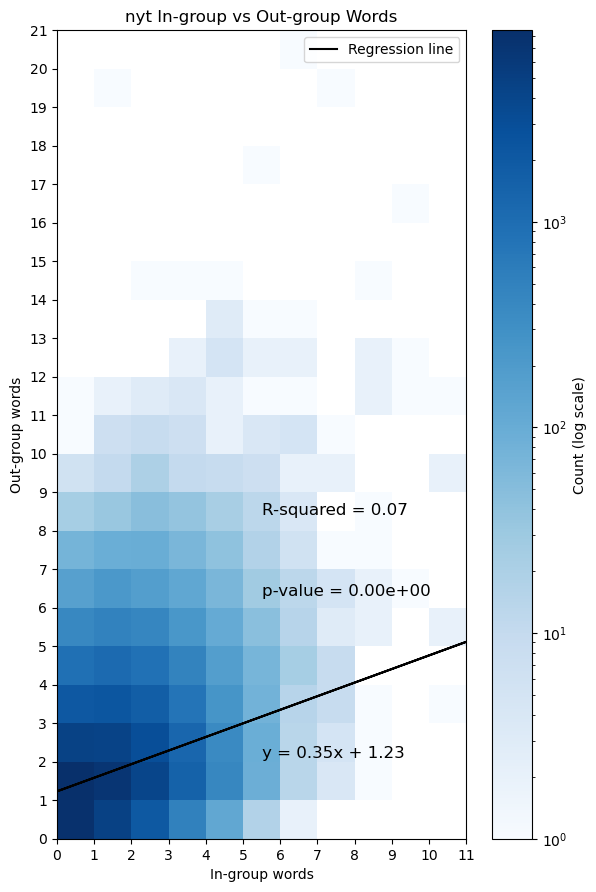

In [ ]:
regression('nyt')